#  Visualiser et analyser l’exécution d’un run (une instance)

['%-\n', '% index = 1109, name = bbob_f001_i21_d05__bbob_f001_i22_d05\n', '% instance = 10, reference value = 8.333324796267920e-001\n', '% function evaluation | indicator value | target hit\n', '1\t1.108631211723292e+000\t1.122018454301963e+000\n', '5\t1.004058856195792e+000\t1.023292992280754e+000\n', '7\t5.516110566745198e-001\t5.623413251903491e-001\n', '35\t5.303678730813080e-001\t5.370317963702527e-001\n', '37\t4.812704330187475e-001\t4.897788193684462e-001\n', '41\t4.775900113470938e-001\t4.786300923226383e-001\n', '43\t3.570256401761885e-001\t3.630780547701014e-001\n', '56\t3.397925961954670e-001\t3.467368504525316e-001\n', '66\t3.183570453115490e-001\t3.235936569296283e-001\n', '85\t3.142784112703169e-001\t3.162277660168379e-001\n', '100\t2.935729335815991e-001\t2.951209226666385e-001\n', '106\t2.822824800572557e-001\t2.884031503126606e-001\n', '128\t2.273134022472334e-001\t2.290867652767773e-001\n', '140\t2.235154844069781e-001\t2.238721138568340e-001\n', '269\t2.068054695609

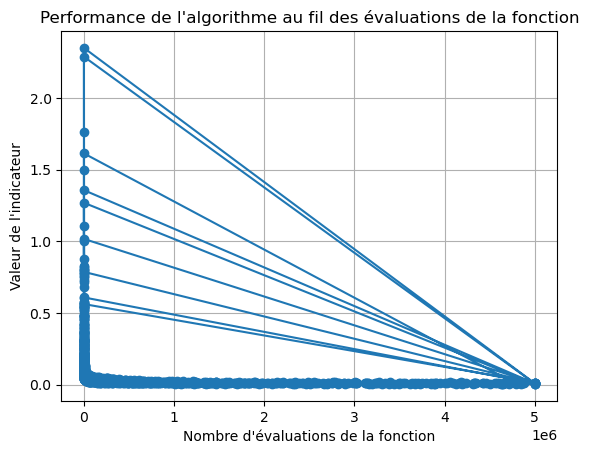

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Charger les données à partir du fichier data.txt
with open('bbob-biobj_f01_d05_hyp.dat', 'r') as file:
    lines = file.readlines()
    print(lines)

# Extrait les données pertinentes
data = []
for line in lines:
    if line.strip() and not line.startswith('%'):
        parts = line.strip().split()
        print(line)
        data.append((int(parts[0]), float(parts[1])))

# Convertir les données en numpy arrays pour faciliter la manipulation
data = np.array(data)

# Étape 2 : Analyse exploratoire des données
# Afficher quelques statistiques descriptives
print("Nombre total de points :", len(data))
print("Valeur minimale de l'indicateur :", np.min(data[:, 1]))
print("Valeur maximale de l'indicateur :", np.max(data[:, 1]))
print("Moyenne de l'indicateur :", np.mean(data[:, 1]))
print("Écart-type de l'indicateur :", np.std(data[:, 1]))

# Étape 3 : Visualisation des résultats
plt.plot(data[:, 0], data[:, 1], marker='o', linestyle='-')
plt.xlabel('Nombre d\'évaluations de la fonction')
plt.ylabel('Valeur de l\'indicateur')
plt.title('Performance de l\'algorithme au fil des évaluations de la fonction')
plt.grid(True)
plt.show()


## Histogramme de la distribution des valeurs de l'indicateur

Cet histogramme représente la distribution des valeurs de l'indicateur extraites des données. Il permet de visualiser la répartition des performances de l'algorithme sur l'ensemble des instances ou des évaluations.

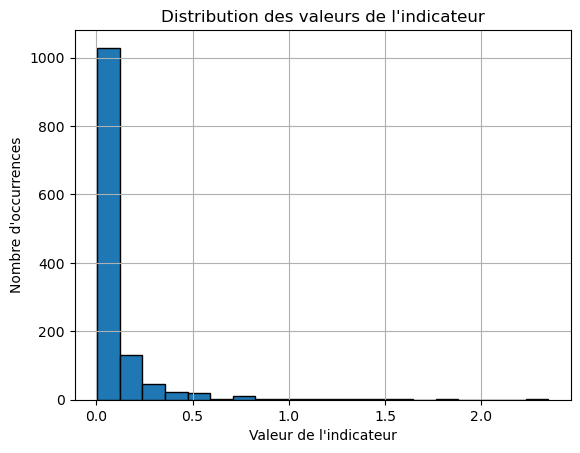

In [33]:
plt.hist(data[:, 1], bins=20, edgecolor='black')
plt.xlabel('Valeur de l\'indicateur')
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des valeurs de l\'indicateur')
plt.grid(True)
plt.show()


## Boîte à moustaches pour visualiser la répartition des valeurs de l'indicateur

Cette visualisation utilise une boîte à moustaches pour montrer la répartition des valeurs de l'indicateur. La boîte indique le premier quartile, la médiane et le troisième quartile de la distribution, tandis que les moustaches représentent la plage des valeurs non extrêmes.

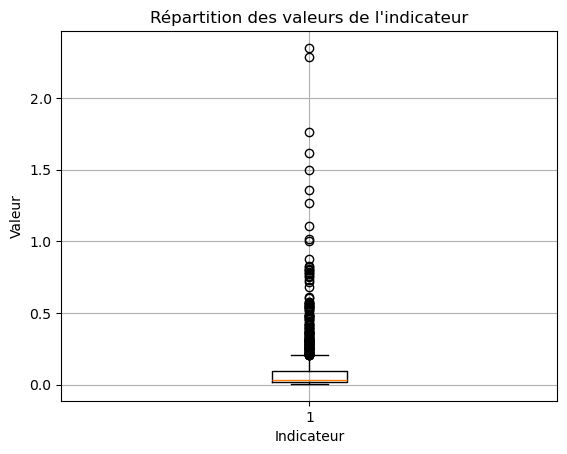

In [28]:
plt.boxplot(data[:, 1])
plt.xlabel('Indicateur')
plt.ylabel('Valeur')
plt.title('Répartition des valeurs de l\'indicateur')
plt.grid(True)
plt.show()


## Performance de l'algorithme par instance

Ce graphique trace les performances de l'algorithme pour chaque instance en fonction du nombre d'évaluations de la fonction. Il permet de comparer la convergence de l'algorithme pour différentes instances.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


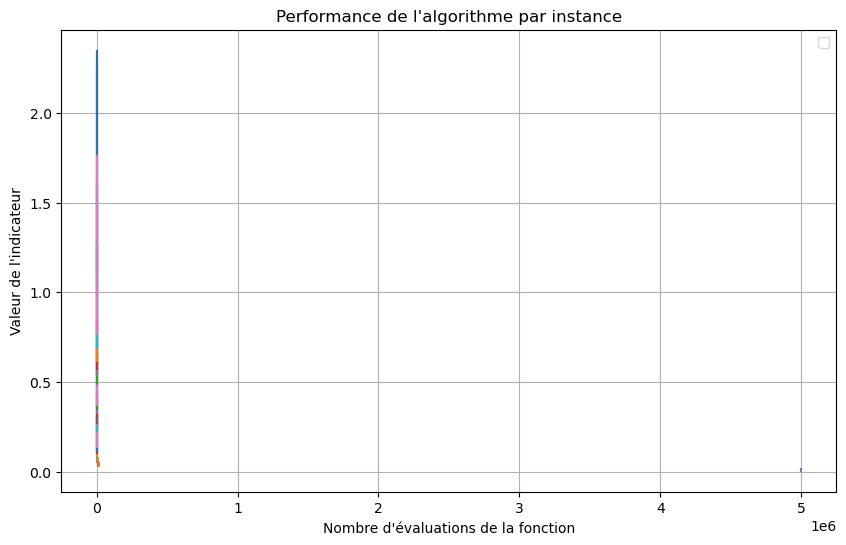

In [32]:
plt.figure(figsize=(10, 6))
for instance in np.unique(data[:, 0]):
    instance_data = data[data[:, 0] == instance]
    plt.plot(instance_data[:, 0], instance_data[:, 1])
plt.xlabel('Nombre d\'évaluations de la fonction')
plt.ylabel('Valeur de l\'indicateur')
plt.title('Performance de l\'algorithme par instance')
plt.legend()
plt.grid(True)
plt.show()


## Convergence initiale de l'algorithme

Ce graphique montre la convergence initiale de l'algorithme en traçant les valeurs de l'indicateur pour les premières évaluations de la fonction. Il permet d'observer comment l'algorithme progresse au début de son exécution.

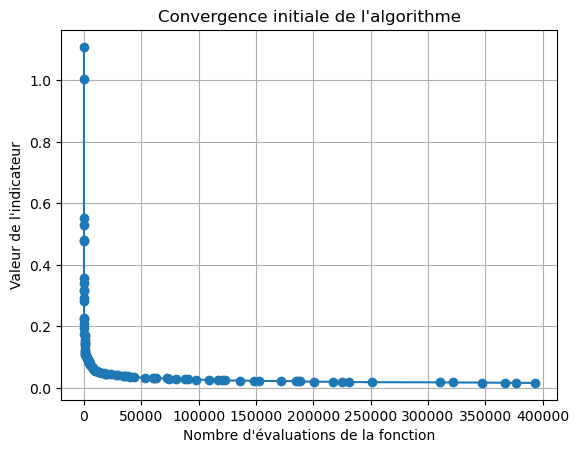

In [31]:
plt.plot(data[:100, 0], data[:100, 1], marker='o', linestyle='-')
plt.xlabel('Nombre d\'évaluations de la fonction')
plt.ylabel('Valeur de l\'indicateur')
plt.title('Convergence initiale de l\'algorithme')
plt.grid(True)
plt.show()


Ce script calcule la moyenne des performances de l'algorithme sur plusieurs runs ou instances, puis visualise cette moyenne pour analyser la tendance générale de la performance.

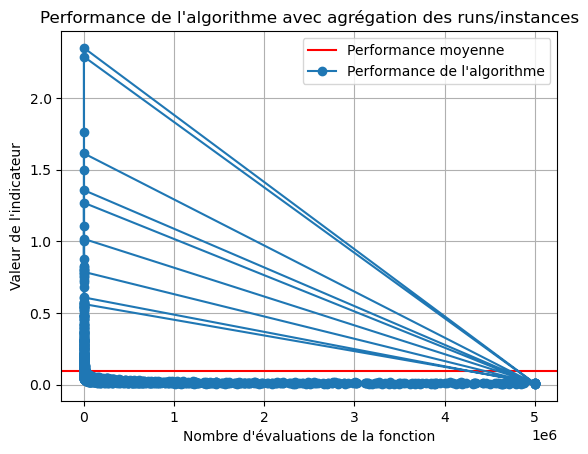

Performance moyenne sur plusieurs runs/instances : 0.09489315588922242


In [36]:
# Calculer la moyenne des performances sur plusieurs runs/instances
mean_performance = np.mean(data[:, 1])

# Visualiser la performance moyenne
plt.axhline(y=mean_performance, color='r', linestyle='-', label='Performance moyenne')
plt.plot(data[:, 0], data[:, 1], marker='o', linestyle='-', label='Performance de l\'algorithme')
plt.xlabel('Nombre d\'évaluations de la fonction')
plt.ylabel('Valeur de l\'indicateur')
plt.title('Performance de l\'algorithme avec agrégation des runs/instances')
plt.legend()
plt.grid(True)
plt.show()

# Analyse de la performance moyenne
print("Performance moyenne sur plusieurs runs/instances :", mean_performance)
